<a href="https://colab.research.google.com/github/ninja03jod/Machine_Learning_Projects/blob/main/Feature_Scaling_Technique_MinMaxScaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Normalization:***
##### ***Basically normalization is used to convert values of numerical columns to common scale....We cannot mixup the units***

#### ***MinMaxScaling***
##### ***Scaling is used to convert the values within range 0-1.***
##### ***Formula is Xi- = Xi - Xmin / Xmax - Xmin***
##### ***formula is used over each values available in dataset***
##### ***In MinMaxScaling If we have Outliers so there will be no any impact on outlier***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
ndf = pd.read_csv("/content/wine_data.csv")
ndf.head(2)
# Basically data looks like

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [ ]:
# here we can use keywords which will help to make pure data while importing the csv file...
df = pd.read_csv("/content/wine_data.csv",header=None,usecols=[0,1,2],names=['class_label','Alcohol','Malic_Acid'])
df

,class_label,Alcohol,Malic_Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

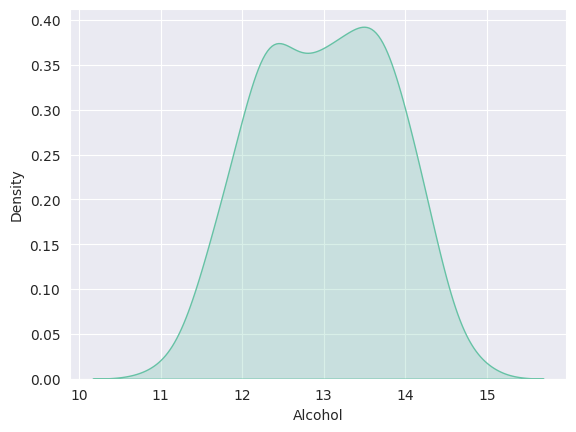

In [ ]:
# Here we seeing the flow of alcohol
sns.kdeplot(data=df,x="Alcohol",fill=True)

<Axes: xlabel='Malic_Acid', ylabel='Density'>

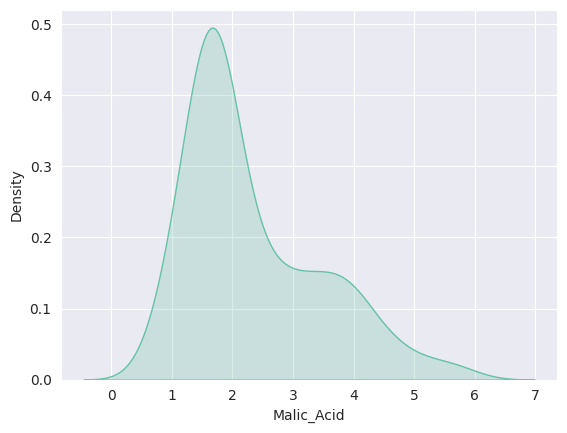

In [ ]:
sns.kdeplot(data=df,x="Malic_Acid",fill=True)

Text(0.5, 1.0, 'Data Before MinMaxScaling')

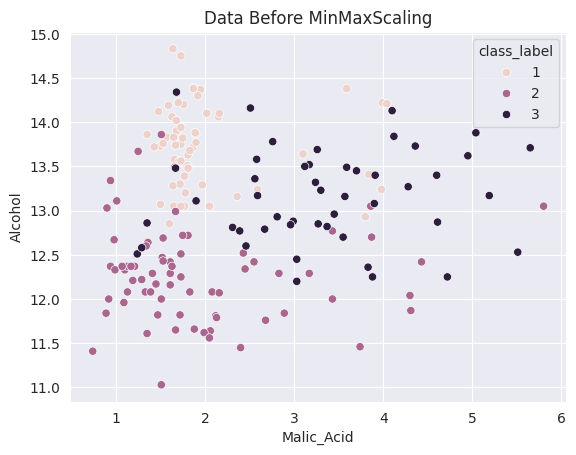

In [ ]:
# Lets see the data in scatter plot befor applying MinMaxScaling:
sns.scatterplot(data=df,x="Malic_Acid",y="Alcohol",hue="class_label")
plt.title("Data Before MinMaxScaling")

### ***whenever we have to use scaling first we need to split the data then we can apply scaling on train and test input features***

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[['Alcohol','Malic_Acid']],df['class_label'],test_size=0.3,random_state=42)
x_train.shape,x_test.shape

((124, 2), (54, 2))

In [ ]:
# Lets import minmaxscaler:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(x_train) # Learns the parameter means it take out min and max from features

x_train_scaled = scaler.transform(x_train) # Aafter using tranforming apply formula on each scale
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Here when we do scaling so output will be 2d numpy array
# lets convert it into dataframe:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_train.columns)

Checking Min and Max value



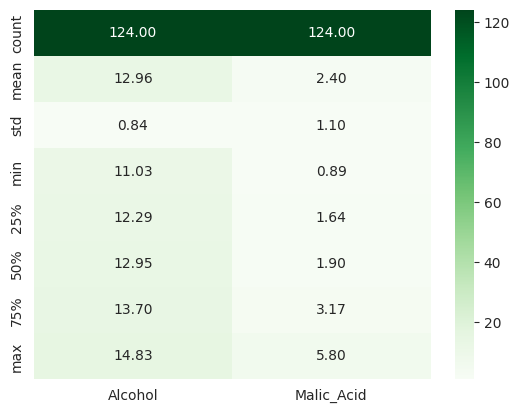

In [ ]:
# Check the min value and max value before and after scaling
before = x_train.describe()
sns.heatmap(data=before,annot=True,fmt=".2f",cmap="Greens")
print(f"Checking Min and Max value\n")

After MinMaxScaling Min value will be 0 and Max value will be 1



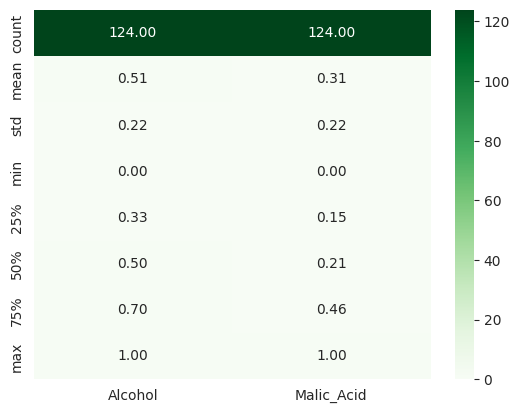

In [ ]:
# When we use MinMaxScaling so our Min value will be 0 and max value will be 1:
after = x_train_scaled.describe()
sns.heatmap(data=after,annot=True,fmt=".2f",cmap="Greens")
print(f"After MinMaxScaling Min value will be 0 and Max value will be 1\n")

After using MinMaxScaling values will be in range 0 - 1



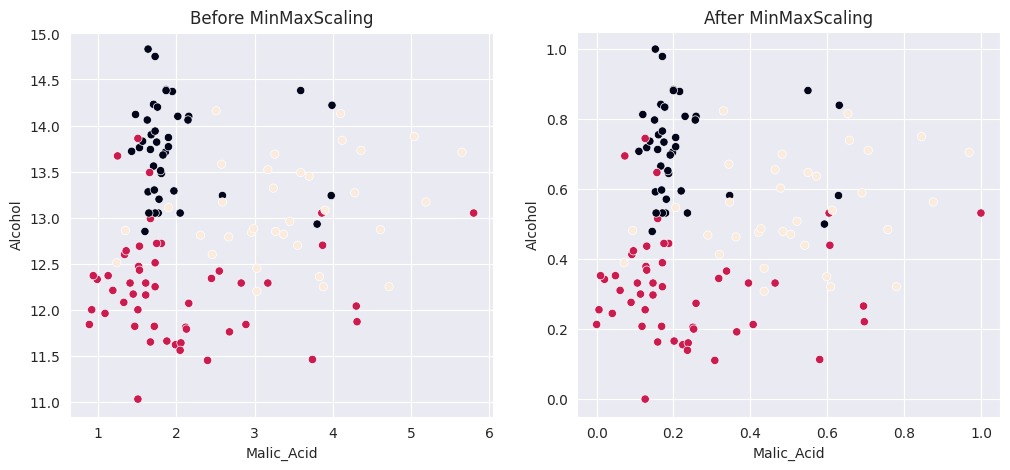

In [59]:
print(f"After using MinMaxScaling values will be in range 0 - 1\n")
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before MinMaxScaling")
sns.scatterplot(data=x_train,x="Malic_Acid",y="Alcohol",ax=ax1,c=y_train)

# After scaling
ax2.set_title("After MinMaxScaling")
sns.scatterplot(data=x_train_scaled,x="Malic_Acid",y="Alcohol",ax=ax2,c=y_train)
plt.show()
# Seaborn approach

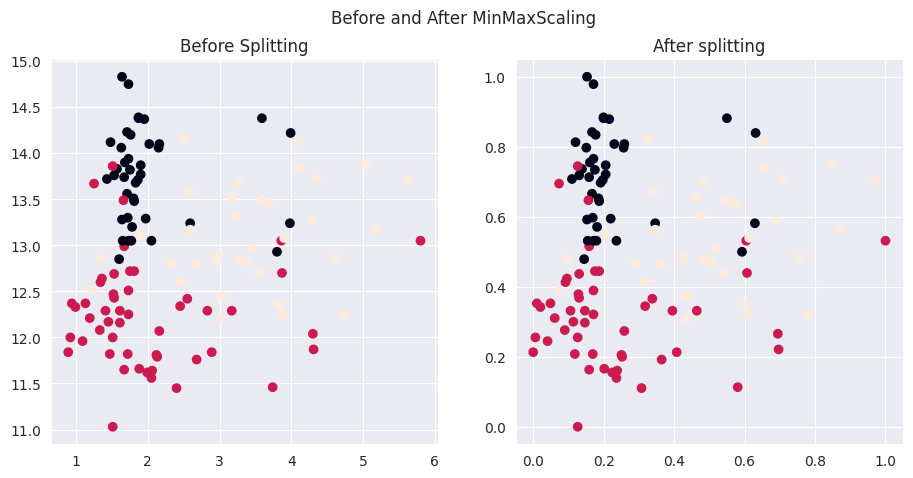

In [51]:
# Now we have to check the How the data will be seen after and before scaling:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(11,5))
ax1.set_title("Before Splitting")
ax1.scatter(x_train['Malic_Acid'],x_train['Alcohol'],c=y_train)
ax2.set_title("After splitting")
ax2.scatter(x_train_scaled['Malic_Acid'],x_train_scaled['Alcohol'],c=y_train)
plt.suptitle("Before and After MinMaxScaling")
plt.show()
# matplotlib approch

In this plot we see the range of Malic acid and Alcohol before scaling

After sacling both values comes in range between 0-1 and this will help to improve model performance



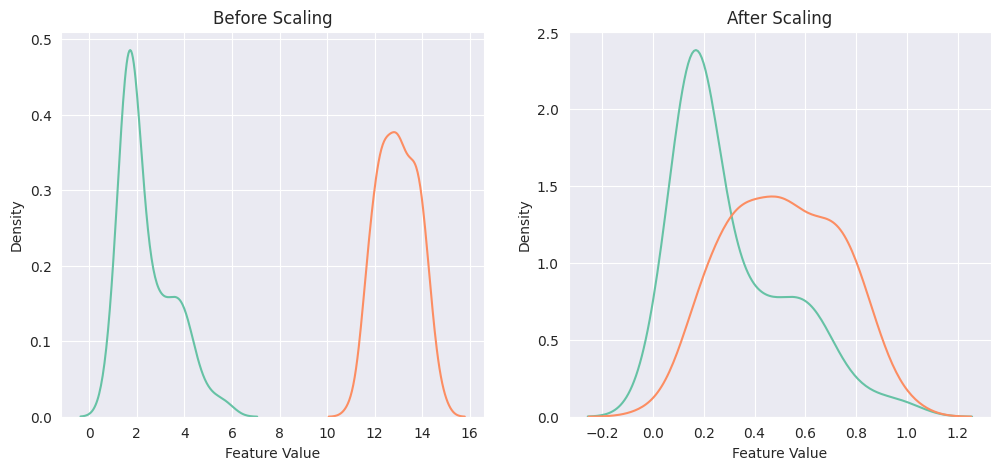

In [74]:
# lets plot kde before after scaling:
print("In this plot we see the range of Malic acid and Alcohol before scaling\n")
print("After sacling both values comes in range between 0-1 and this will help to improve model performance\n")
fig,axs = plt.subplots(ncols=2,figsize=(12,5))

# Plotting before scaling
g1 = sns.kdeplot(x_train['Malic_Acid'], ax=axs[0])
g1 = sns.kdeplot(x_train['Alcohol'], ax=axs[0])
g1.set_title("Before Scaling")
g1.set_xlabel("Feature Value")
g1.set_ylabel("Density")

# Plotting after scaling
g2 = sns.kdeplot(x_train_scaled['Malic_Acid'], ax=axs[1])
g2 = sns.kdeplot(x_train_scaled['Alcohol'], ax=axs[1])
g2.set_title("After Scaling")
g2.set_xlabel("Feature Value")
g2.set_ylabel("Density")

plt.show()
# seaborn approach but here we are not getting the labels for each plot

Here before and after scaling plots

There will be no change in flow of line only scales are changes



Text(0.5, 0.98, 'After scaling of Alcohol and Malic Acid')

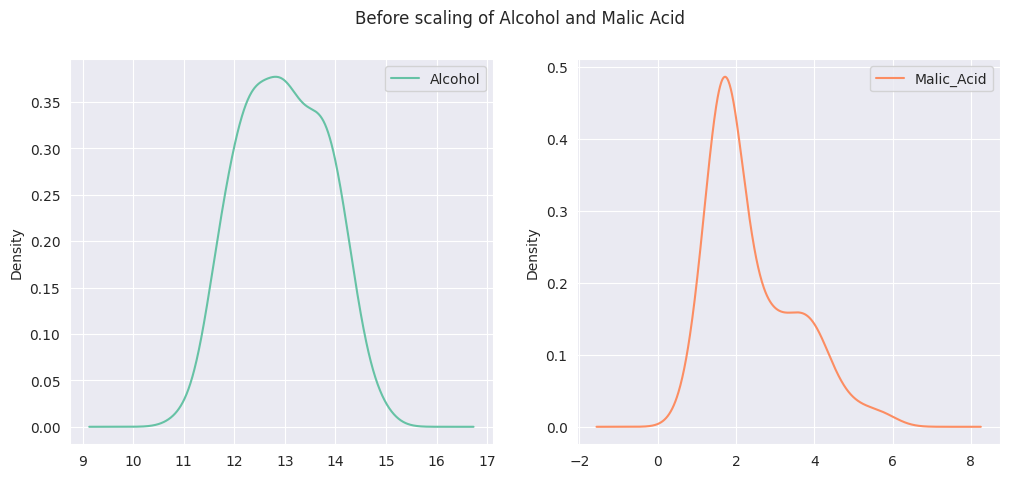

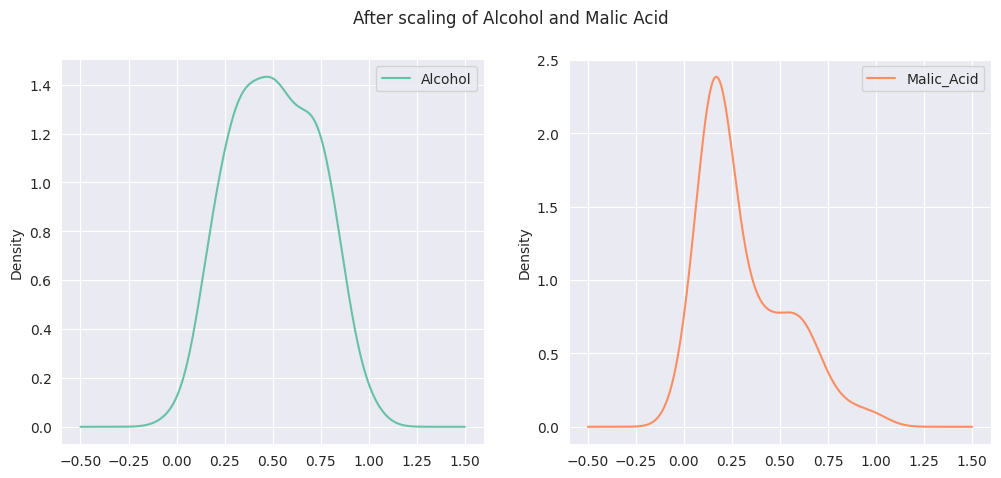

In [92]:
# To show the labels :
print("Here before and after scaling plots\n")
print("There will be no change in flow of line only scales are changes\n")
x_train.plot.kde(subplots=True,layout=(1,2),figsize=(12,5),sharex=False)
plt.suptitle("Before scaling of Alcohol and Malic Acid")
x_train_scaled.plot.kde(subplots=True,layout=(1,2),figsize=(12,5),sharex=False)
plt.suptitle("After scaling of Alcohol and Malic Acid")

In [93]:
df.head()

,class_label,Alcohol,Malic_Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [103]:
# lets add some outliers and peform same operation again:
df = df.append(pd.DataFrame({"class_label":[1,2,3],"Alcohol":[90.4,92,3],"Malic_Acid":[40.4,39.9,0]}),ignore_index=True)
df.tail()

,class_label,Alcohol,Malic_Acid
176,3,13.17,2.59
177,3,14.13,4.10
178,1,90.40,40.40
179,2,92.00,39.90
180,3,3.00,0.00


In [104]:
x1_train,x1_test,y1_train,y1_test = train_test_split(df[['Alcohol','Malic_Acid']],df['class_label'],test_size=0.3,random_state=41)
x1_train.shape,x1_test.shape

((126, 2), (55, 2))

In [105]:
scaler.fit(x1_train)

x1_train_scaled = scaler.transform(x1_train)
x1_test_scaled = scaler.transform(x1_test)

In [106]:
# convert array into df:
x1_train_scaled = pd.DataFrame(x1_train_scaled,columns=x1_train.columns)
x1_test_scaled = pd.DataFrame(x1_test_scaled,columns=x1_train.columns)

<Axes: title={'center': 'After Scaling Outiers Position'}, xlabel='Malic_Acid', ylabel='Alcohol'>

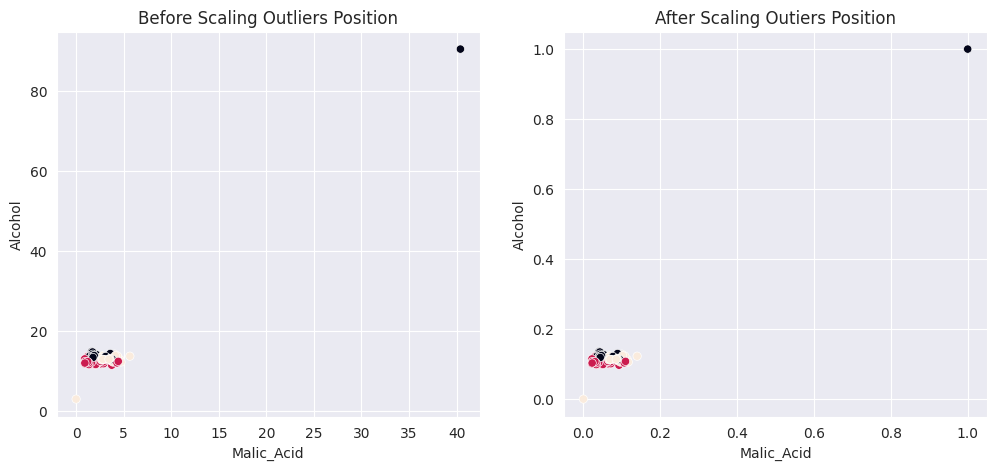

In [108]:
# now lets check the outlier squeez or not:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before Scaling Outliers Position")
sns.scatterplot(data=x1_train,x="Malic_Acid",y="Alcohol",c=y1_train,ax=ax1)
ax2.set_title("After Scaling Outiers Position")
sns.scatterplot(data=x1_train_scaled,x="Malic_Acid",y="Alcohol",c=y1_train,ax=ax2)

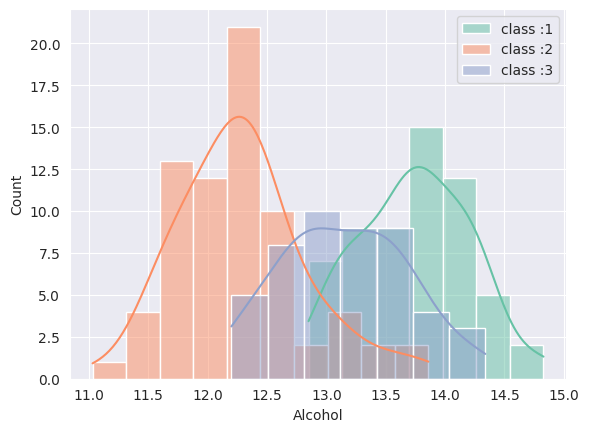

In [78]:
sns.histplot(df[df.class_label == 1]['Alcohol'],kde=True,label="class :1")
sns.histplot(df[df.class_label == 2]['Alcohol'],kde=True,label="class :2")
sns.histplot(df[df.class_label == 3]['Alcohol'],kde=True,label="class :3")
plt.legend()

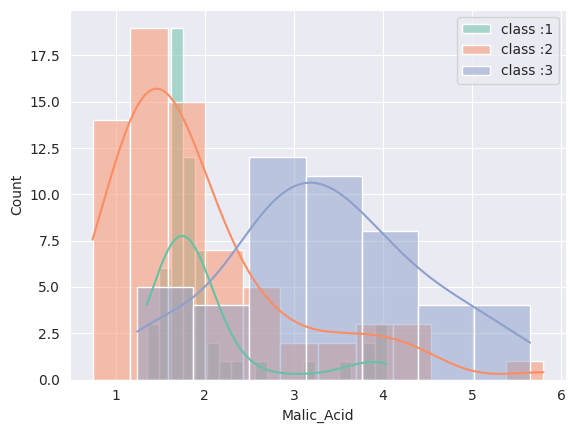

In [ ]:
sns.histplot(df[df.class_label == 1]['Malic_Acid'],kde=True,label="class :1")
sns.histplot(df[df.class_label == 2]['Malic_Acid'],kde=True,label="class :2")
sns.histplot(df[df.class_label == 3]['Malic_Acid'],kde=True,label="class :3")
plt.legend()